## 1. Elaboração do problema 

As doenças cardíacas, conhecidas entre a população como doenças do coração, são a principal causa de mortes em todo o mundo, de acordo com a Organização Mundial da Saúde (OMS). Alguns fatores potencializados pela pandemia têm contribuído para o aumento desse número devido ao estresse e ansiedade que toda a população tem vivido, o que exige um olhar mais atento para prevenir e identificar essas doenças. São fatores de risco para o surgimento das doenças cardíacas a obesidade, sedentarismo, fumo, consumo elevado de sal, alimentação desregrada, abuso de bebidas alcoólicas e outras hábitos não saudáveis.

Diversos exames precisam ser realizados para que seja possível identificar o risco de um paciente apresentar doença cardíaca. Além disso, diversos sintomas são apresentados em uma pessoa que está desenvolvendo ou já desenvolveu algum tipo de doença cardíaca. Por esse motivo, seria de muito valor, ter acesso de forma agil e eficaz, uma primeira avaliação de forma a classificar se um paciente pode vir a desenvolver doença cardíaca.

Pensando nessa situação, o presente projeto possui como principal objetivo, desenvolver um modelo de classificação de _machine learning_ que irá realizar a previsão se um paciente possui risco, ou não, de apresentar algum tipo de doença cardíaca. O mesmo será construido baseado nos dados disponíveis pela [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). 

Aqui serão avaliadas diversas etapas na construição de um projeto de Ciência de Dados, desde a avaliação inicial dos dados, passando pela análise exploratória, pré-processamento dos dados, tratamento das variáveis, construção de um modelo protótipo, avaliação de diversos tipos de modelo para a construção e elaboração de um modelo final.

## 2. Importação das bibliotecas e carregamento dos dados

Aqui, vamos importar algumas bibliotecas que iremos utilizar durante esse projeto.

In [1365]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from sklearn.preprocessing import QuantileTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
%matplotlib inline
mpl.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

Realizando a inserção dos dados em um DataFrame e dando uma inspecionada nas 5 primeiras linhas do mesmo para entendermos um pouco melhor como estão estruturados esses dados.

In [246]:
df = pd.read_csv("processed.cleveland.data")
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


## 3. Primeiro contato com os dados

Vemos aqui as colunas rotuladas com números ao invés dos nomes de cada atributo (_feature_). Para o nosso propósito esse tipo de estruturação do DataFrame não irá contribuir em nada, por esse motivo vamos modificar a nomenclatura das colunas utilizando informações que a fonte de onde os dados foram importados nos fornece: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

- **age**
- **sex**
- **cp**, chest pain
- **restbp**, resting blood pressure (in mm Hg)
- **chol**, serum cholesterol in mg/dl
- **fbs**, fasting blood sugar
- **restecg**, resting electocardiographic results
- **thalach**, maximum heart rate achieved
- **exang**, exercise induced angina
- **oldpeak**, ST depression induced by exercise relavite to rest
- **slope**, the slope of the peak exercise ST segment
- **ca**, number of major vassels (0-3) colored by fluoroscopy
- **thal**, this is short of thalium heart scan
- **hd**, diagnosis of heart disease, the predicted attribute

In [247]:
df.columns = ['age','sex','cp','restb','chol',
              'fbs','restecg','thalach','exang','oldpeak',
              'slope','ca','thal','hd']

In [248]:
df.head()

,age,sex,cp,restb,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


Os nomes das colunas fornecidos pelo site citado acima, estão em inglês e a grande maioria de forma abreviada. Para isso, foi feito uma pequena tradução e intepretação dos termos, para que possamos consultar posteriormente os nomes das _features_ e quais os seus significados.

- **age**: idade
- **sex**: gênero
- **cp**: dor no peito
- **restbp**: pressão arterial em repouso
- **chol**: colesterol sérico
- **fbs**: açúcar no sangue em jejum
- **restecg**: resultados elecardiográficos em repouso
- **thalach**: frequência cardíaca máxima alcançada
- **exang**: angina induzida por exercício
- **oldpeak**: depressão de ST induzida por exercicio em relação ao repouso
- **slope**: inclinação do pico do segmento ST do exercício
- **ca**: número de vasos principais coloridos por fluoroscopia
- **thal**: falta de exame cardíaco de tálio
- **hd**: diagnóstico de doença cardíaca

Ao olharmos para o `shape` do nosso DataFrame, vemos que o mesmo possui, $302$ dados de pacientes (linhas) e $14$ _features_ ou atributos, ou também chamado de variáveis preditoras (colunas)

In [249]:
df.shape

(302, 14)

Podemos obter um breve resumo das estatísticas descritivas do conjunto de dados do projeto utilizando o método `describe()`.

In [250]:
df.describe()

,age,sex,cp,restb,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Com essa tabela podemos nos atentar a algumas características principalmente das _features_ numéricas.
- Como por exemplo, a menor idade de um paciente nesse dataset é de 29 anos, enquanto que o paciente mais velho possui 77 anos.
- Também podemos observar que o mínimo valor de colesterol sérico encontrado em um paciente foi de 126 mg/dl, o maior valor de 564 mg/dl, enquanto que, na média, os pacientes possuem um valor de 246 mg/dl

Vamos agora verificar se existem dados faltantes no nosso DataFrame utilizando os comandos `isnull()` que procura por todo o dataset valores que estão faltantes com "Null" e logo em seguida o método `sum()` faz a soma desses valores que foram encontrados pelo comando anterior.

In [251]:
df.isnull().sum()

age        0
sex        0
cp         0
restb      0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

A princípio não existe nenhum dado faltante no dataset. Entretando, vamos fazer uma inspeção mais profunda e avaliar, para cada coluna (_feature_), quantos valores únicos existem para ela, utilizando o método `unique()`.:

In [252]:
colunas = list(df.columns)
for col in colunas:
    print("{} : ".format(col))
    print(df[col].unique())

age : 
[67. 37. 41. 56. 62. 57. 63. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
sex : 
[1. 0.]
cp : 
[4. 3. 2. 1.]
restb : 
[160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124. 125.
 142. 128. 145. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
chol : 
[286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263. 199.
 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247. 167.
 230. 335. 234. 233. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 

Aqui vemos uma situação interessante, as duas últimas _features_ ($ca$ e $thal$) do dataset possuem o simbolo " $?$ " como valor único entre suas categorias. Posteriormente, vamos ver que pra essas duas _features_, esse simbolo é inapropriado e deve receber algum tipo de processamento.<br>
Vamos contar quantos valores existem no dataset com o simbolo de interrogação:

In [253]:
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [254]:
df.shape[0]

302

In [255]:
porcentagem = len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])/df.shape[0] * 100
print("A porcentagem de '?' no dataset é de {}%".format(porcentagem))

A porcentagem de '?' no dataset é de 1.9867549668874174%


A porcentagem do simbolo de interrogação no dataset é menor do que 2% dos valores de todos os dados no conjunto. Por esse motivo vamos simplesmente retirar esses dados e trabalhar com um novo DataFrame sem simbolos inadequados.

In [256]:
df = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
df['ca'].unique(), df['thal'].unique()

(array(['3.0', '2.0', '0.0', '1.0'], dtype=object),
 array(['3.0', '7.0', '6.0'], dtype=object))

Além disso, vemos que a nossa _feature_ $ hd $, que nada mais é a variável que iremos prever, possui 5 diferentes categorias, isto é, valores únicos.
De acordo com [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease), existem diferentes valores para a presença de doença cardíaca (1,2,3,4) e um valor para ausência (0). De forma a simplificar a análise, neste projeto será realizada apenas a distinção da presença (valor 1) ou ausência (valor 0) de doença cardíaca. <br>
Por isso, vamos alterar os valores que são **maiores do que 0** para apenas 1.

In [257]:
hd_not_zero_index = df['hd'] > 0
df['hd'][hd_not_zero_index] = 1
df['hd'].unique()

array([1, 0], dtype=int64)

Antes de dar continuidade no desenvolvimento do projeto, vamos dar uma olhada no tipo dos dados das nossas _features_ e também realizar uma divisão entre as _features_ categórigas e _features_ numéricas.
Olhando novamente para a célula onde avaliamos os valores únicos das colunas, podemos perceber que, **age**,**restbp**, **chol**, **thalach** e **oldpeak** apresentam características mais contínuas do que as demais. Dessa forma, vamos caracterizá-las como _features_ numéricas e as demais como _features_ categóricas

In [258]:
df.dtypes

age        float64
sex        float64
cp         float64
restb      float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [259]:
df.columns

Index(['age', 'sex', 'cp', 'restb', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd'],
      dtype='object')

In [260]:
numericas = [df.columns[0], df.columns[3], df.columns[4],
            df.columns[7], df.columns[9]]
print("Features numéricas: {}".format(numericas))
categoricas = [df.columns[1], df.columns[2], df.columns[5],
               df.columns[6], df.columns[8], df.columns[10],
               df.columns[11], df.columns[12],df.columns[13]]
print("Features categóricas: {}".format(categoricas))

Features numéricas: ['age', 'restb', 'chol', 'thalach', 'oldpeak']
Features categóricas: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'hd']


## 4. Análise Exploratória dos Dados

Vamos avaliar como está distribuida a nossa variável que iremos realizar a previsão (variável _target_).

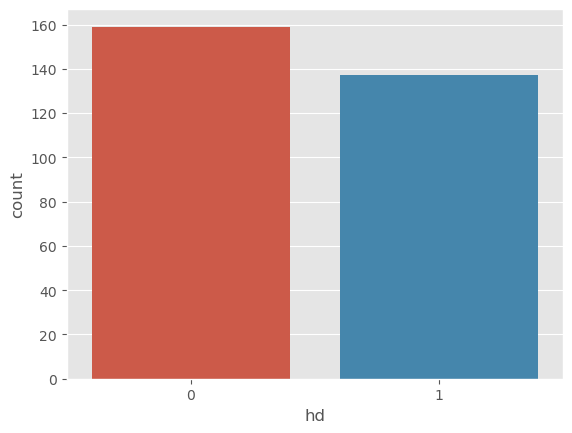

In [261]:
sns.countplot(x=df['hd']);

Podemos inferir que os dados do nosso _target_ não estão desbalanceados (isto é, a proporção de pessoas com presença de doença cardíaca não é muito diferente das que não apresentam.

In [262]:
sim = df['hd'] == 1
nao = df['hd'] == 0
total = len(df['hd'])
proporcao_sim = sim.sum()/total
proporcao_nao = nao.sum()/total
print("Porcentagem de pacientes que apresentam doença cardíaca: {}%"\
     .format(100*proporcao_sim.round(2)))
print("Porcentagem de pacientes que não apresentam doença cardíaca: {}%"\
     .format(100*proporcao_nao.round(2)))

Porcentagem de pacientes que apresentam doença cardíaca: 46.0%
Porcentagem de pacientes que não apresentam doença cardíaca: 54.0%


Os cinco gráficos abaixo, irão nos dizer a respeito da distribuição das variáveis numéricas presentes no dataset. 

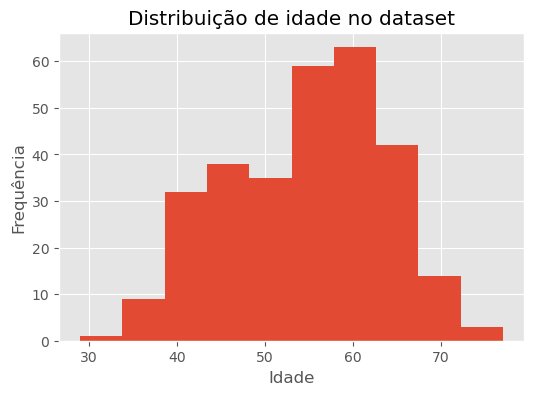

In [263]:
df[numericas[0]].plot(kind='hist',figsize=(6,4))
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title("Distribuição de idade no dataset")
plt.show()

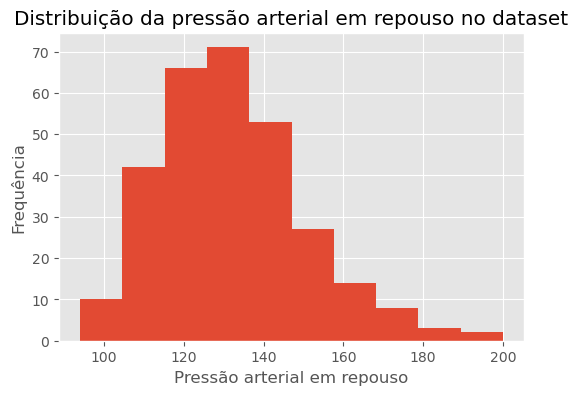

In [264]:
df[numericas[1]].plot(kind='hist',figsize=(6,4))
plt.xlabel('Pressão arterial em repouso')
plt.ylabel('Frequência')
plt.title("Distribuição da pressão arterial em repouso no dataset")
plt.show()

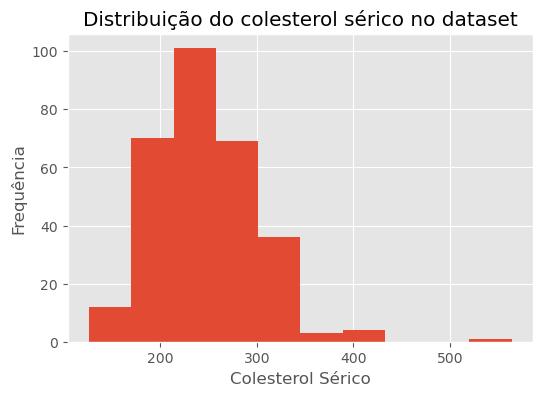

In [265]:
df[numericas[2]].plot(kind='hist',figsize=(6,4))
plt.xlabel('Colesterol Sérico')
plt.ylabel('Frequência')
plt.title("Distribuição do colesterol sérico no dataset")
plt.show()

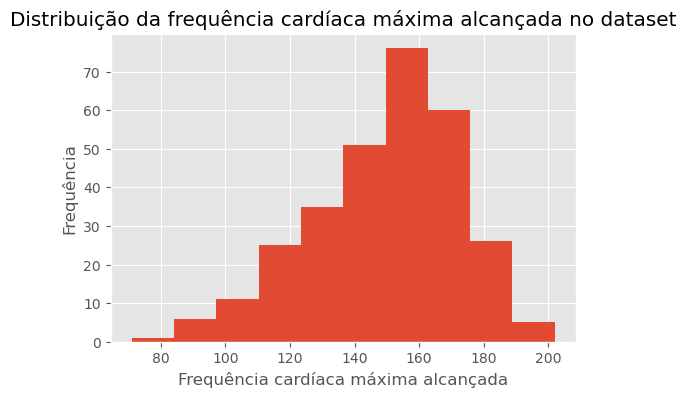

In [266]:
df[numericas[3]].plot(kind='hist',figsize=(6,4))
plt.xlabel('Frequência cardíaca máxima alcançada')
plt.ylabel('Frequência')
plt.title("Distribuição da frequência cardíaca máxima alcançada no dataset")
plt.show()

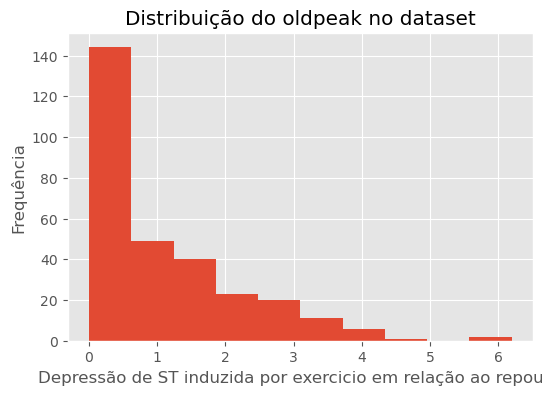

In [267]:
df[numericas[4]].plot(kind='hist',figsize=(6,4))
plt.xlabel('Depressão de ST induzida por exercicio em relação ao repouso')
plt.ylabel('Frequência')
plt.title("Distribuição do oldpeak no dataset")
plt.show()

É possível observar, que algumas dessas variáveis, não apresentam características de uma distribuição normal. Especificamente no gráfico do colesterol sérico, podemos dizer que existe um _outlier_. Esses pontos serão avaliados posteriormente, durante a etapa de preprocessamento e avaliação do protótipo do modelo, para verificarmos se ao realizarmos algumas transformações nessas variáveis, o desempenho do modelo irá melhorar ou não.

Agrupados por idade e sexo, vamos verificar o número de pacientes que são afetados por doença cardíaca por idade presente no dataset.

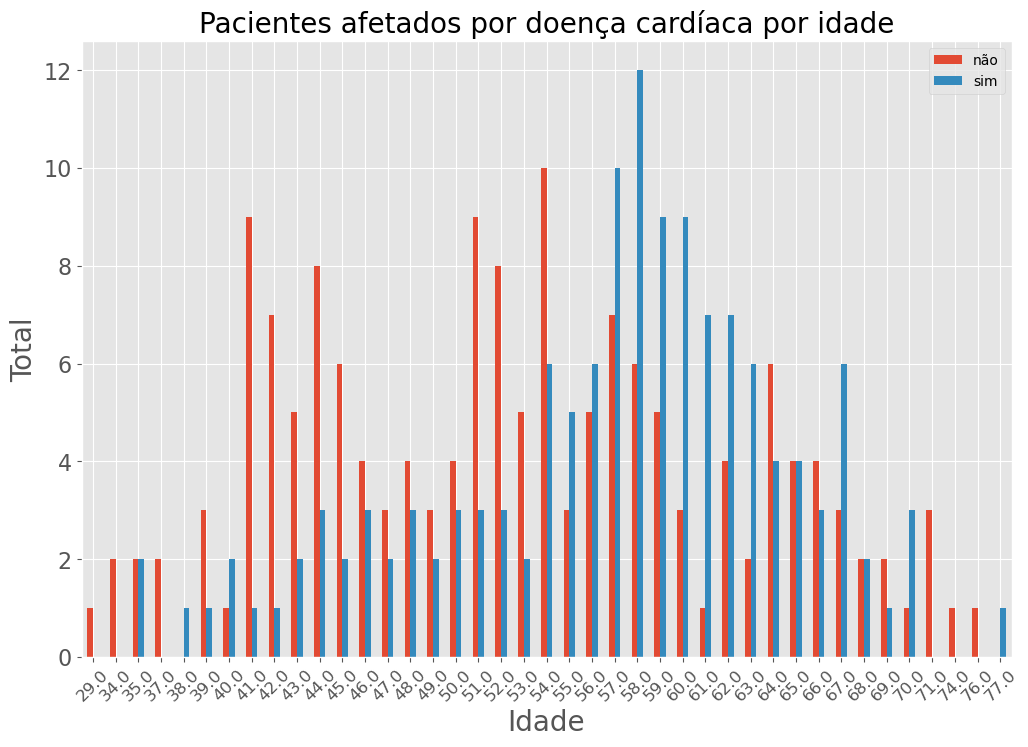

In [268]:
df.groupby(['age','hd'])['sex'].count().unstack().plot.bar(figsize=(12,8))
plt.gca().legend(('não','sim'))
plt.xticks(rotation=45,size=12)
plt.yticks(size=16)
plt.xlabel("Idade", size=20)
plt.ylabel("Total", size=20)
plt.title("Pacientes afetados por doença cardíaca por idade", size=20);

Aproximadamente a partir de $54$ anos, o número de pacientes afetados por doença cardíaca aumenta consideravelmente, tendo seu valor mais extremo aos $58$ anos.

Dentre as principais variáveis numéricas, vamos avaliar alguns **box plots** entre os pacientes que apresentam ou não doença cardíaca. 

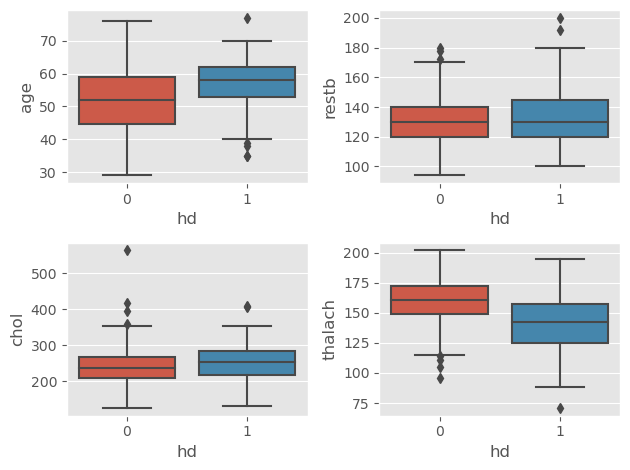

In [269]:
fig, axes = plt.subplots(2,2)
sns.boxplot(data=df, x='hd', y='age', ax=axes[0][0])
sns.boxplot(data=df, x='hd', y='restb', ax=axes[0][1])
sns.boxplot(data=df, x='hd', y='chol', ax=axes[1][0])
sns.boxplot(data=df, x='hd', y='thalach', ax=axes[1][1])
fig.tight_layout()

Como mendionado anteriormente, na _feature_ **chol**, colesterol sérico, temos a presença de um _outlier_. Com gráficos do tipo _box plot_ fica facilmente possível identificar esse tipo de característica presente nos dados analisados.

### 4.1 Buscando correlações

Vamos avaliar se existe algum tipo de correlação entre as variáveis do DataFrame. Inicalmente vamos verificar a correlação entre as variáveis numéricas, que foram separadas anteriormente e em seguida, será construido um **heat map** da correlação entre todas as variáveis do DataFrame.

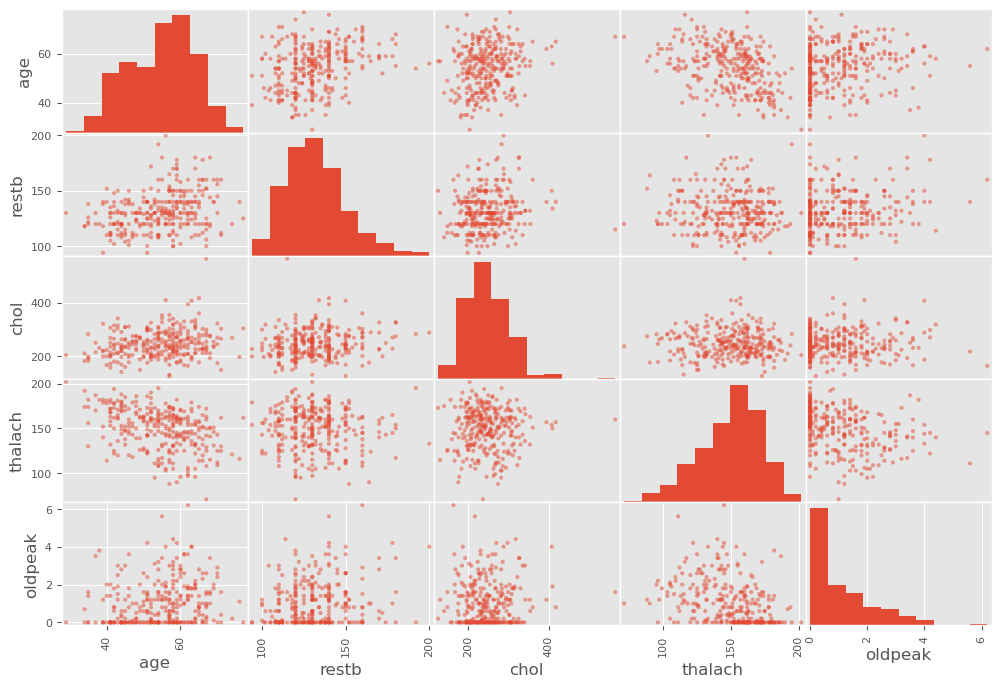

In [270]:
scatter_matrix(df[numericas],figsize=(12,8));

Outra forma de obter o mesmo gráfico:

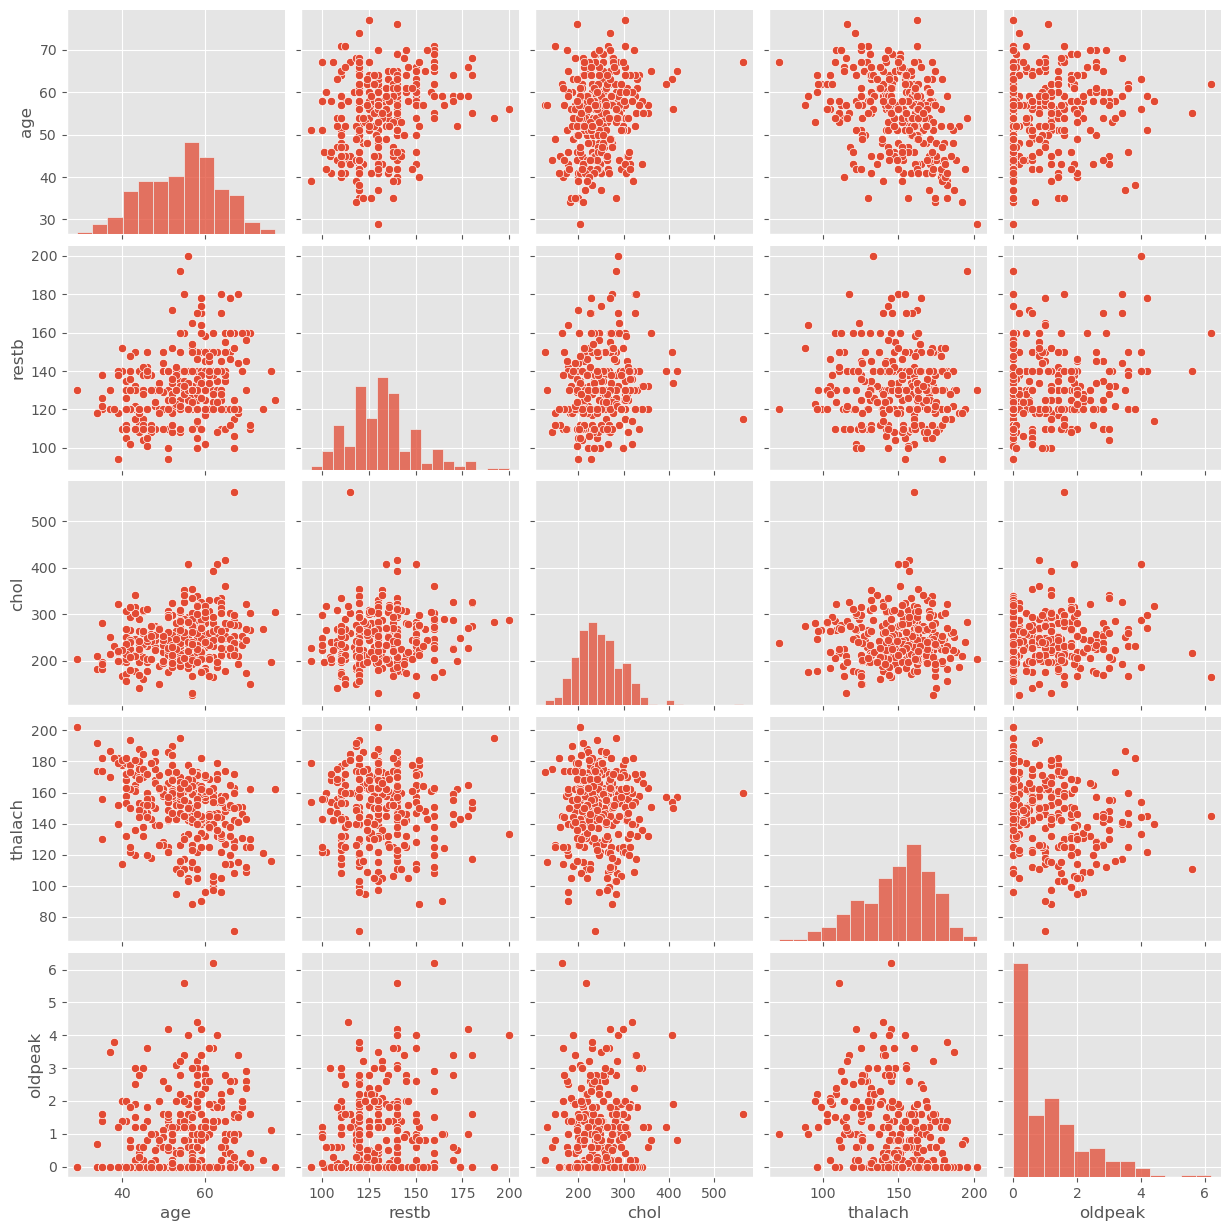

In [371]:
sns.pairplot(df[numericas], vars = numericas)
plt.show();

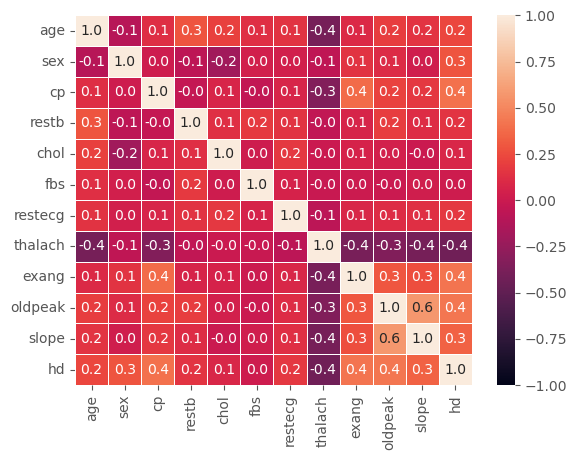

In [271]:
correlacao = df.corr()
sns.heatmap(correlacao, vmin = -1, vmax = 1,
            annot = True, 
            fmt=".1f", 
            linewidths=.6);

- Para as **variáveis numéricas**, visualmente, não é possível identificar um correlação entre elas, visto que quando uma dessas variáveis aumenta, nenhuma outra possui a tendência de aumentar juntamente com a primeira. Os pontos nesses gráficos apresentam caracteristicas bem dispersas.
- Para as **variaveis como um todo**, o _heat map_ mostra a forma como todas as variáveis estão correlacionadas entre si. Valores que se aproximam de $1$, indicado pela cor amarela mais clara, possuem forte correlação positiva, valores que se aproximam de $-1$, indicado pela cor roxo escuro, possuem forte correlação negativa.
    -  Os valores mais extremos de **correlação positiva**, estão na faixa de $0.6$. Por exemplo, o _slope_, inclinação do pico do segmento ST do exercício, possui uma correlação de $0.6$ com o _oldpeak_, a depressão de ST induzida por exercício em relação ao repouso
    - Já os valores extremos de **correlação negativa**, estão na faixa de $-0.4$. Por exemplo, o _exang_, angina induzida por exercício, possui correlação de $-0.4$ com a _thalach_, frequencia cardíaca máxima alcançada. <br>
    
De maneira geral, podemos dizer que não existem forte correlações positivas e negativas entre as variáveis do DataFrame. Visto que avaliamos, que os valores extremos se encontram na faixa de $0.6$ e $-0.4$.

## 5. Pre-processamento dos dados

Antes de mais nada, vamos realizar a separação dos dados em conjunto de treino e conjunto de teste. Também vamos fazer a distinção entre as _features_ preditoras e a variável a ser prevista. Realizar essa separação entre conjunto de treino e teste deve ser realizada antes da etapa de pre-processamento para evitar com que haja "vazamento" dos dados de treino para o conjunto de teste. Esse fenômeno é chamado de **data leakage** e se ocorrer em um projeto, pode causar problemas durante a avaliação do modelo levando ao **overfitting** do modelo.

In [272]:
# Variáveis preditoras
X = df.drop(columns=['hd'])
# Variável target
y = df['hd']

In [273]:
X.head()

,age,sex,cp,restb,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0


In [274]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: hd, dtype: int64

In [785]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    train_size=0.80,
                                                    random_state=42)

In [786]:
X_train.shape, y_train.shape

((236, 13), (236,))

In [787]:
X_test.shape, y_test.shape

((60, 13), (60,))

Realizada a separação dos conjuntos de treino e conjunto de teste, vamos trabalhar no pré-processamento, somente com o conjunto de treino, isto é, o `X_train`. 

A interpretação de todas as _features_, assim como os valores que cada uma delas pode tomar, pode ser entendida da seguinte forma, de acordo com [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease): 

- **age**, idade **Float**
- **sex**, gênero **Category**
    - 0 - Feminino
    - 1 - Masculino
- **cp**, dor no peito, **Category**
    - 1 - angina típica
    - 2 - angina atípica
    - 3 - dor não anginosa
    - 4 - assimtomático
- **restbp**, pressão arterial em repouso (em mm Hg), **Float**
- **chol**, colesterol sérico em mg/dl, **Float**
- **fbs**, açúcar no sangue em jejum, **Category**
    - 0 - >= 120 mg/dl
    - 1 - < 120 mg/dl
- **restecg**, resultados elecardiográficos em repouso, **Category**
    - 1 - normal
    - 2 - tendo anormalidade da onda ST-T
    - 3 - mostrando (provavel ou definida) hipertrofia ventricular esquerda 
- **thalach**, frequência cardíaca máxima alcançada, **Float**
- **exang**, angina induzida por exercício, **Category**
    - 0 - nao
    - 1 - sim
- **oldpeak**, depressão de ST induzida por exercicio em relação ao repouso, **Float**
- **slope**, inclinação do pico do segmento ST do exercício, **Category**
    - 1 - ascendente
    - 2 - plana
    - 3 - descendente
- **ca**, número de vasos principais coloridos por fluoroscopia, **Float**
- **thal**, falta de exame cardíaco de tálio, **Category**
    - 3 - normal (sem pontos frios)
    - 6 - defeito fixo (pontos frios durante o repouso e exercício)
    - 7 - defeito reversível (quando os pontos frios aparecem apenas durante o exercício)

### 5.1 Trabalhando com variáveis categóricas

Sabemos que as variáveis categóricas são `['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']`. Vamos avaliar duas maneiras de realizar o tratamento dessas variáveis:

In [788]:
X_train_get_dummies= pd.get_dummies(X_train, columns=categoricas)
X_test_get_dummies= pd.get_dummies(X_test, columns=categoricas)
print("{} , {}".format(X_train_get_dummies.shape,
                      X_test_get_dummies.shape))


(236, 28) , (60, 28)


- Utilizando a função `get_dummies()` do pandas, criamos variáveis "dummies" para os diferentes atributos presentes nas _features_ categóricas.

In [789]:
one_hot_enc = OneHotEncoder()
train_cat_OHEnc = one_hot_enc.fit_transform(X_train[categoricas])
train_cat_OHEnc = train_cat_OHEnc.toarray()
X_train_cat_OHEnc = pd.DataFrame(train_cat_OHEnc, 
                                  columns=one_hot_enc.get_feature_names_out(),
                                index=X_train[categoricas].index)

test_cat_OHEnc = one_hot_enc.transform(X_test[categoricas])
test_cat_OHEnc = test_cat_OHEnc.toarray()
X_test_cat_OHEnc = pd.DataFrame(test_cat_OHEnc, 
                                  columns=one_hot_enc.get_feature_names_out(),
                                index=X_test[categoricas].index)
print("{} , {}".format(X_train_cat_OHEnc.shape,
                      X_test_cat_OHEnc.shape))

(236, 23) , (60, 23)


- Utilizando o método `OneHotEncoder()`, criamos também variáveis "dummies" para os variados tipos de atributos no dataset. 

## 6. Avaliação de um modelo protótipo

Nessa etapa, vamos avaliar quatro modelos de **Árvore de Decisão**, **Decision Tree**. Utilizando o método `DecisionTreeClassifier()`. Como vamos avaliar um protótipo de modelo baseado em uma Decision Tree, não precisamos nos preocupar tanto com o escalonamento (_feature_scaling) das variáveis. 

A razão para isso é que as árvores de decisão fazem divisões em cada variável separadamente e, portanto, a escala dos dados não afeta diretamente o processo de divisão. Ou seja, as árvores de decisão são invariantes à escala das variáveis.

Além disso, o escalonamento pode até mesmo prejudicar o desempenho das árvores de decisão, pois pode alterar a ordem das divisões, tornando-as menos intuitivas e menos interpretáveis.

In [793]:
# Dados com get_dummies apenas (sem escalonamento)
X_train_final = X_train_get_dummies
X_test_final = X_test_get_dummies

In [810]:
decision_tree = DecisionTreeClassifier(random_state=42)
dt = decision_tree.fit(X_train_final,y_train)

print(f"Train SCORE: {decision_tree.score(X_train_final, y_train):.2f}")
print(f"Test SCORE: {decision_tree.score(X_test_final, y_test):.2f}")

Train SCORE: 1.00
Test SCORE: 0.83


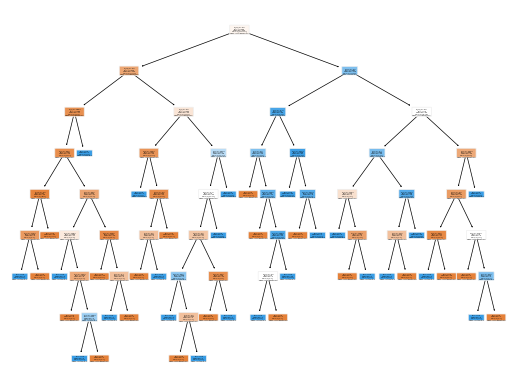

In [822]:
plot_tree(decision_tree,filled=True, 
          rounded=True,
          class_names=['Não possui D.C', 'Possui D.C']);

Conforme era de se esperar de um modelo de Decision Tree, o modelo **"overfittou"** com os dados de treinamento e obteve uma grande queda no desempenho quando avaliado para os dados de teste. 

Vamos avaliar alguns tipos de métrica, nos dados de teste (após realizada a previsão) para ver se conseguimos tirar melhores conclusões a respeito do desempenho deste modelo protótipo.
- A $Acurácia$, mede a proporção de exemplos classificados corretamente pelo modelo em relação ao número total de exemplos. Pode ser enganosa em conjuntos de dados desbalanceados.

$$ accuracy = {TP + TN \over TP + FP + TN + FN}$$
- A $Precisão$, mede a proporção de exemplos positivos classificados corretamente pelo modelo em relação ao número total de exemplos classificados como positivos. É uma métrica útil quando o objetivo é minimizar os falsos positivos.

$$ precision = {TP \over TP + FP}$$
- O $Recall$, mede a proporção de exemplos positivos classificados corretamente pelo modelo em relação ao número total de exemplos positivos no conjunto de dados. É uma métrica útil quando o objetivo é minimizar os falsos negativos.

$$ recall = {TP \over TP + FN}$$

- O $F1 score$ é a média harmônica da precisão e recall, e é uma métrica comum para avaliar a qualidade geral do modelo em problemas de classificação. É útil quando é importante obter um equilíbrio entre precisão e recall.

$$ F_{1} = {2 x {{precision x recall}\over{precision + recall}}} = {TP\over{TP + {FN + FP \over 2}}} $$ 

- $AUC ROC score$, é a área sob a curva ROC (Receiver Operating Characteristic) e é uma métrica comum para avaliar a qualidade geral do modelo em problemas de classificação, ela mostra a relação entre a taxa de verdadeiros positivos e a taxa de falsos positivos em diferentes limiares de decisão. Quanto maior a AUC ROC, melhor é o desempenho do modelo em separar as classes.

Dentre as métricas apresentadas, precisamos voltar nossas atenções principalmente para o **Recall**, devido ao fato do mesmo ser uma métrica utilizada com o objetivo é minimizar os falsos negativos. 

Nesse projeto falsos negativos podem implicar a seguinte situação: se chegar um paciente **novo** que **de fato possui risco** de desenvolver doença caridíaca, e o modelo **predizer** que o mesmo **não possui risco** de desenvolver a doença, ele não irá receber o devido tratamento e poderá ocasionar em sérios problemas para o paciente futuramente.

In [824]:
y_pred = decision_tree.predict(X_test_final)

print("------ Métricas de desempenho nos dados de teste ------")
print(f"Acurácia: {accuracy_score(y_test,y_pred):.2f}")
print(f"Precisão: {precision_score(y_test,y_pred):.2f}")
print(f"Recall: {recall_score(y_test,y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test,y_pred):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test,y_pred):.2f}")

------ Métricas de desempenho nos dados de teste ------
Acurácia: 0.83
Precisão: 0.77
Recall: 0.83
F1 Score: 0.80
ROC-AUC: 0.83


Para melhorar o desempenho de uma Decision Tree, precisamos avaliar o **cost complex pruning (CCP)** que, matematicamente é descrita pela equação abaixo:

$$ C(Tree) = Error(T) + \alpha |T|$$

ou seja, a complexidade da Decision Tree $C(T)$ é a soma do erro daquele modelo $Error(T)$, mais o produto do número de folhas da Decision Tree $|T|$ por $\alpha$ que é o parâmetro que penaliza a complexidade do modelo.

Por esse motivo, a célula abaixo realiza uma 'discretização" de $27$ valores de alpha e treina um modelo de DecisionTree para cada um desses alphas em um loop:

In [796]:
path = dt.cost_complexity_pruning_path(X_train_final, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

dts = []

for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(X_train_final,y_train)
    dts.append(dt)

Agora, vamos salvar as métricas de score, tanto para os dados de treinamento, quanto para de teste, dessas DecisionTree treinadas.
O gráfico abaixo mostra como varia a acurácia do modelo, nos dados de treino e teste, conforme o valor de alpha varia dentro da faixa estabelecida anteriormente.

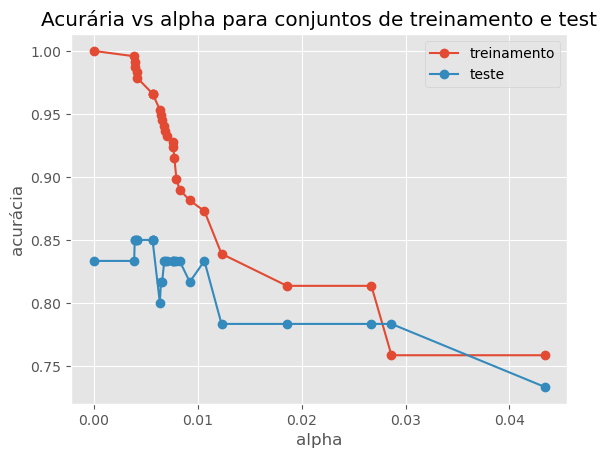

In [797]:
train_scores = [dt.score(X_train_final,y_train) for dt in dts]
test_scores = [dt.score(X_test_final,y_test) for dt in dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('acurácia')
ax.set_title('Acurária vs alpha para conjuntos de treinamento e test')
ax.plot(ccp_alphas, train_scores, marker='o',label='treinamento')
ax.plot(ccp_alphas, test_scores, marker='o', label='teste')
ax.legend()
plt.show()

Vamos tomar o primeiro ponto de intersecção entre as curvas de treinamento e teste do gráfico acima. Um valor para alpha de aproximadamente $0.025$ pode ser visualmente identificado.

Com esse valor de alpha em mãos, vamos treinar uma DecisionTree, deixando especificado que queremos o valor deste parâmetro para o treinamento do modelo. Além disso esse modelo será treinado e avaliado utilizando o método `cross_val_score()` que realiza o treinamento do modelo por meio de uma validação cruzada. 
- O objetivo da validação cruzada é estimar o desempenho do modelo em dados não vistos, ou seja, dados que não foram utilizados no treinamento do modelo. Na validação cruzada, o conjunto de dados de treinamento é dividido em várias partes, chamadas de "folds", e o modelo é treinado em cada um dos folds enquanto é avaliado em outro fold. Dessa forma, cada fold é usado tanto para treinamento quanto para avaliação do modelo, garantindo que o modelo seja avaliado em diferentes conjuntos de dados de treinamento e teste. Ao final da validação cruzada, é comum utilizar a média das métricas de desempenho em cada fold como uma estimativa da performance do modelo em dados não vistos.

No código abaixo foi especificado que se realize a validação cruzada com um número de "folds" = $10$.

<Axes: xlabel='tree'>

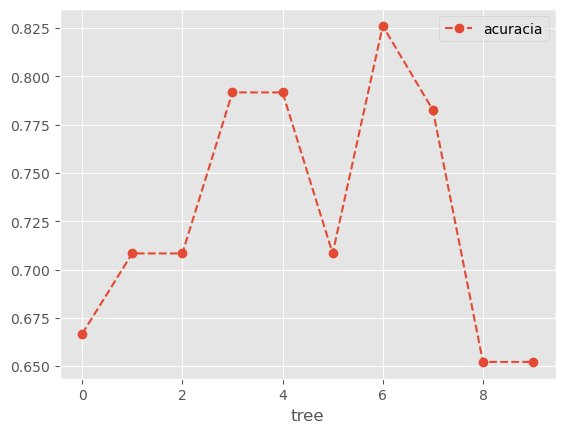

In [798]:
dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0285)

scores = cross_val_score(dt, X_train_final, y_train, cv=10)
df = pd.DataFrame(data={'tree':range(10), 'acuracia':scores})
df.plot(x='tree',y='acuracia',marker='o',linestyle='--')

Pelo gráfico acima é possível observar que na sexta validação, obtivemos um modelo que atingiu uma acurácia de $0.825$ na etapa de treinamento.

Em seguida, dentre os $27$ alphas discretizados anteriormente, vamos treinar um modelo de DecisionTree para cada valor de alpha e realizar novamente uma validação cruzada (_cross-validation_) com número de folds igual a $10$.

Para cada valor de alpha, o modelo é avaliado por validação cruzada 10 vezes, retornando para a lista `alpha_loop_values` o valor de alpha daquela iteração e a média dos scores das 10 validações que foram realizadas pelo `cross_val_scores` também daquela iteração.

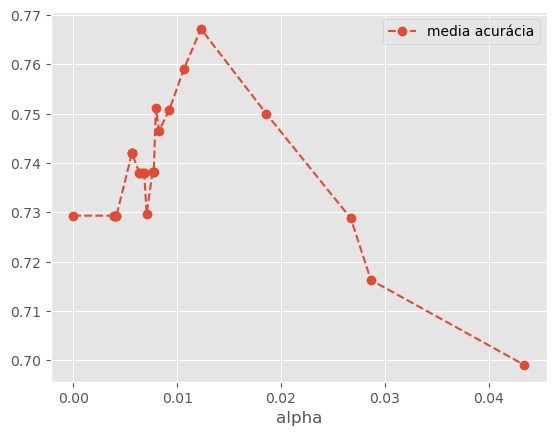

In [814]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt,X_train_final, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha','media acurácia'])

alpha_results.plot(x='alpha',y='media acurácia',marker='o',linestyle='--');

O gráfico acima mostra que podemos extrair um valor de alpha na faixa de $0.012$ que desempenhou um valor de acurácia média durante a validação cruzada de aproximadamente $0.77$.

In [815]:
ideal_ccp_alpha = alpha_results[
    alpha_results['media acurácia'] == 
    alpha_results['media acurácia'].max()]['alpha'][:1]
ideal_ccp_alpha = float(ideal_ccp_alpha)
print(f"Melhor alpha da Decision Tree prunada: {ideal_ccp_alpha:.6f}")
print(f"Acurácia média deste modelo: {alpha_results['media acurácia'].max():.4f}")

Melhor alpha da Decision Tree prunada: 0.012288
Acurácia média deste modelo: 0.7672


Com o melhor valor de alpha determinado, podemos treinar uma DecisionTree Pruned, que apresenta caracteristicas bem menos complexa comparada com as primeiras que construimos anteriormente. 

Abaixo temos a **Confusion Matrix** do modelo prunado, onde podemos avaliar o quanto o nosso modelo de classificação está errando ou acertando nas predições.
- Dentre os pacientes que **não apresentam** Doença Cardíaca, nosso modelo acertou **29 vezes**.
- Dentre os pacientes que **apresentam** Doença Cardíaca, nosso modelo acertou **18 vezes**. 
- Dentre os pacientes que **não apresentam** Doença Cardíaca, nosso modelo classificou que apresentavam Doença Cardíaca **7 vezes**.
- Dentre os pacientes que **apresentavam** Doença Cardíaca, nosso modelo classificou que não apresentavam Doença Cardíaca **6 vezes**.

In [816]:
dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
model_dt_pruned = dt_pruned.fit(X_train_final, y_train)
print("Score para a DecisionTree final (após avaliação de cost complexity pruning)")
print(f"Train SCORE: {dt_pruned.score(X_train_final, y_train):.2f}")
print(f"Test SCORE: {dt_pruned.score(X_test_final, y_test):.2f}")

Score para a DecisionTree final (após avaliação de cost complexity pruning)
Train SCORE: 0.84
Test SCORE: 0.78


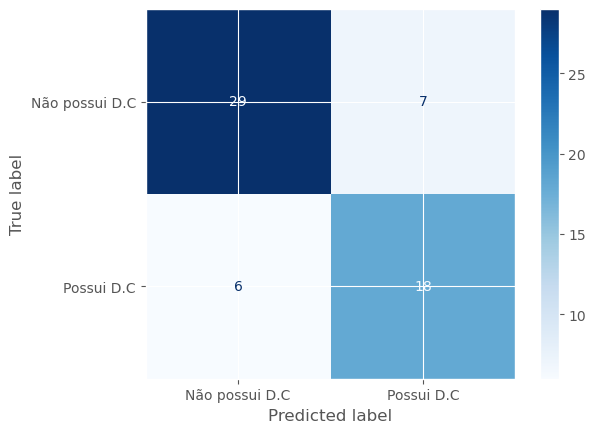

In [817]:
ConfusionMatrixDisplay.from_estimator(dt_pruned,
                                     X_test_final,y_test,
                                     display_labels=['Não possui D.C',
                                                     'Possui D.C'],
                                     cmap=plt.cm.Blues)

Podemos verificar uma DecisionTree bem menos complexa quando comparada com a primeira que foi construidas sem a realização do processo de cost complex pruning.

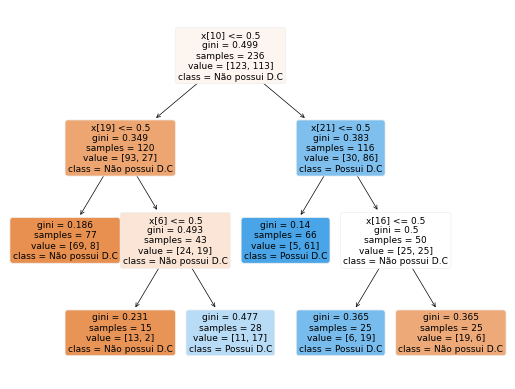

In [803]:
plot_tree(dt_pruned,filled=True, 
          rounded=True,
          class_names=['Não possui D.C', 'Possui D.C']);

Por mais que o desempenho geral dessa nova Decision Tree tenha sido relativamente mais baixo, inclusive o Recall, temos a certeza de que o modelo está evitando situações de _overfitting_, devido a natural facilidade de um modelo de Decision Tree tem em cair em _overfitting_ durante o seu treinamento.

In [804]:
y_pruned_pred = dt_pruned.predict(X_test_final)
print("------ Métricas de desempenho (PRUNED) nos dados de teste ------")
print(f"Acurácia: {accuracy_score(y_test,y_pruned_pred):.2f}")
print(f"Precisão: {precision_score(y_test,y_pruned_pred):.2f}")
print(f"Recall: {recall_score(y_test,y_pruned_pred):.2f}")
print(f"F1 Score: {f1_score(y_test,y_pruned_pred):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test,y_pruned_pred):.2f}")

------ Métricas de desempenho (PRUNED) nos dados de teste ------
Acurácia: 0.78
Precisão: 0.72
Recall: 0.75
F1 Score: 0.73
ROC-AUC: 0.78


## 7. Seleção e avaliação do modelo.

Após feita uma análise inicial de um modelo relativamente mais simples, vamos construir e avaliar alguns modelos mais complexos e robustos de forma a encontrar algum que nos retorne um melhor desempenho.

In [1434]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

Vamos utilizar quatro algoritmos diferentes para realizar a seleção e avaliação do nosso modelo. Eles serão: `RandomForestClassifier`, `SVC`, `KNeighborsClassifier` e `LogisticRegression`. Abaixo segue uma breve descrição sobre os algoritmos que serão implementados logo adiante.

- **Random Forest**: é um algoritmo de machine learning que pertence à família de métodos de "ensemble learning". Ela é uma extensão da Decision Tree, que combina várias Decisions Tree individuais para criar um modelo mais robusto e geralmente mais preciso. Um conjunto aleatório de subconjuntos de dados é extraído do conjunto de dados original para treinar várias Decisions Tree. Cada Tree é treinada de forma independente, usando uma amostra aleatória do conjunto de dados original, e toma decisões com base em um conjunto aleatório _features_. A Random Forest tem várias vantagens, como a capacidade de lidar com dados desbalanceados, a capacidade de lidar com um grande número de recursos e a capacidade de detectar interações não lineares entre _features_. Ela também é menos suscetível a overfitting do que uma única Decision Tree, pois cada Tree é treinada em uma amostra diferente dos dados.
- **SVC**: (Support Vector Machine) é um algoritmo de machine learning que pode ser usado para classificação ou regressão. Ele funciona encontrando um hiperplano que separa os exemplos de duas classes em um espaço de alta dimensão. O hiperplano é escolhido de tal forma que maximiza a distância entre os exemplos de cada classe mais próximos, o que é chamado de margem. É útil quando os dados não são linearmente separáveis, pois ele utiliza uma técnica chamada "kernel trick" para mapear os dados em um espaço de alta dimensão onde eles podem ser separados linearmente. Essa técnica permite que o SVC encontre hiperplanos complexos que se ajustem aos dados de maneira mais precisa. Tem várias vantagens, como a capacidade de lidar com dados de alta dimensão e a capacidade de lidar com dados não lineares. Ele também é menos suscetível a overfitting do que outros algoritmos de aprendizado de máquina.
- **KNeighborsClassifer**: é um algoritmo de machine learning que é usado para classificação de dados. Ele se baseia em uma abordagem de vizinhança, ou seja, a classe de um novo exemplo é prevista com base na classe dos exemplos mais próximos. Durante o treinamento, o modelo armazena os exemplos de treinamento e suas respectivas classes em uma estrutura de dados que permite uma busca rápida pelos exemplos mais próximos. Ao classificar um novo exemplo, o algoritmo calcula a distância entre esse exemplo e todos os exemplos de treinamento e seleciona os k exemplos mais próximos. O KNeighborsClassifier tem várias vantagens, como a facilidade de interpretação, a capacidade de lidar com dados de alta dimensão e a capacidade de lidar com dados não lineares. No entanto, ele pode ser sensível a outliers e pode não funcionar bem com dados desbalanceados.
- **LogisticRegression**: é um algoritmo de machine learning usado para modelar a probabilidade de um evento ocorrer. É frequentemente usado em problemas de classificação binária, onde o objetivo é prever se um exemplo pertence a uma das duas classes possíveis. A Regressão Logística modela a probabilidade de um exemplo pertencer a uma das classes usando uma função logística, que mapeia uma entrada contínua para uma saída no intervalo [0, 1]. Durante o treinamento, o modelo ajusta os parâmetros de tal forma que a função logística se ajuste aos dados de treinamento de maneira ideal, maximizando a probabilidade de obter as classes corretas. Ele pode lidar com dados não lineares através de transformações de características, como a criação de novas variáveis a partir de combinações lineares das variáveis originais. Além disso, a Regressão Logística é menos suscetível a overfitting do que outros algoritmos de machine learning.

In [1435]:
modelos = [RandomForestClassifier(random_state=42), 
          SVC(random_state=42),
          KNeighborsClassifier(),
          LogisticRegression(random_state=42)]

metrics_list = ['accuracy', 'precision','recall','f1']

modelos_nomes = ["Random Forest", 
                 "SVM Classifier", 
                 "KNN Classifier", 
                 "Logistic Regression"]

modelos_dict = {}
i = 0 
cv = 10
for modelo in modelos:
    model = modelo
    metricas = cross_validate(model, X_train, y_train, 
                              scoring=metrics_list, cv = cv)
    modelos_dict[modelos_nomes[i]] = {"acurácia":metricas['test_accuracy'],
                                     "precision":metricas['test_precision'],
                                     "recall": metricas['test_recall'],
                                     "f1 score": metricas['test_f1']}
    i += 1

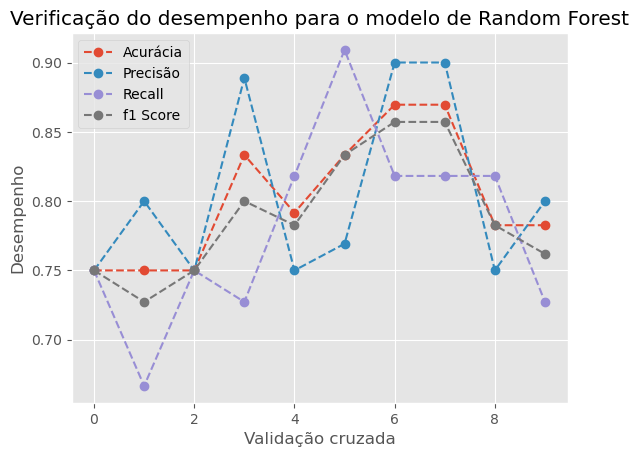

In [1436]:
plt.figure
plt.plot(range(cv), modelos_dict['Random Forest']['acurácia'],
         marker='o',linestyle='--',label='Acurácia')
plt.plot(range(cv), modelos_dict['Random Forest']['precision'],
        marker='o',linestyle='--',label='Precisão')
plt.plot(range(cv), modelos_dict['Random Forest']['recall'],
        marker='o',linestyle='--',label='Recall')
plt.plot(range(cv), modelos_dict['Random Forest']['f1 score'],
        marker='o',linestyle='--',label='f1 Score')
plt.legend()
plt.xlabel("Validação cruzada")
plt.ylabel("Desempenho")
plt.title("Verificação do desempenho para o modelo de Random Forest")
plt.show()

In [1437]:
print("--- Valores médios das métricas para a Random Forest: ")
print(f"Acurácia: {modelos_dict['Random Forest']['acurácia'].mean():.4f}")
print(f"Precisão: {modelos_dict['Random Forest']['precision'].mean():.4f}")
print(f"Recall: {modelos_dict['Random Forest']['recall'].mean():.4f}")
print(f"F1 Score: {modelos_dict['Random Forest']['f1 score'].mean():.4f}")

--- Valores médios das métricas para a Random Forest: 
Acurácia: 0.8013
Precisão: 0.8058
Recall: 0.7803
F1 Score: 0.7902


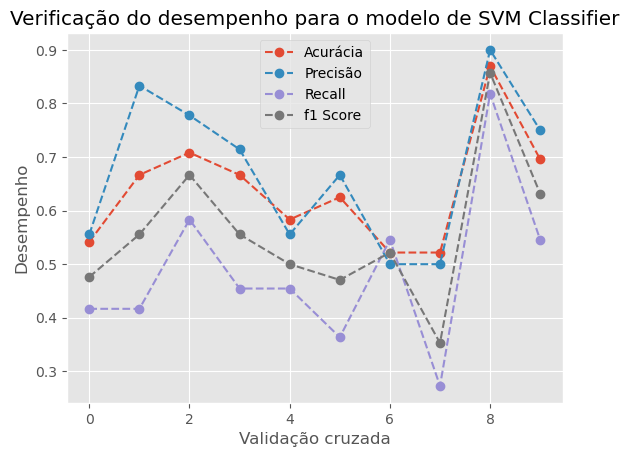

In [1438]:
plt.figure
plt.plot(range(cv), modelos_dict['SVM Classifier']['acurácia'],
         marker='o',linestyle='--',label='Acurácia')
plt.plot(range(cv), modelos_dict['SVM Classifier']['precision'],
        marker='o',linestyle='--',label='Precisão')
plt.plot(range(cv), modelos_dict['SVM Classifier']['recall'],
        marker='o',linestyle='--',label='Recall')
plt.plot(range(cv), modelos_dict['SVM Classifier']['f1 score'],
        marker='o',linestyle='--',label='f1 Score')
plt.legend()
plt.xlabel("Validação cruzada")
plt.ylabel("Desempenho")
plt.title("Verificação do desempenho para o modelo de SVM Classifier")
plt.show()

In [1439]:
print("--- Valores médios das métricas para o SVM Classifier: ")
print(f"Acurácia: {modelos_dict['SVM Classifier']['acurácia'].mean():.4f}")
print(f"Precisão: {modelos_dict['SVM Classifier']['precision'].mean():.4f}")
print(f"Recall: {modelos_dict['SVM Classifier']['recall'].mean():.4f}")
print(f"F1 Score: {modelos_dict['SVM Classifier']['f1 score'].mean():.4f}")

--- Valores médios das métricas para o SVM Classifier: 
Acurácia: 0.6400
Precisão: 0.6753
Recall: 0.4871
F1 Score: 0.5588


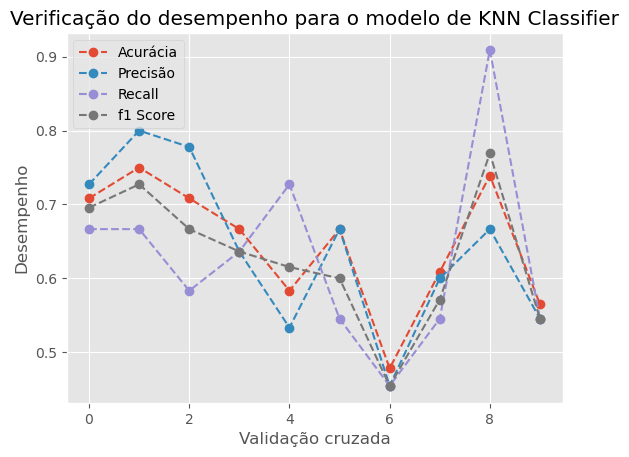

In [1440]:
plt.figure
plt.plot(range(cv), modelos_dict['KNN Classifier']['acurácia'],
         marker='o',linestyle='--',label='Acurácia')
plt.plot(range(cv), modelos_dict['KNN Classifier']['precision'],
        marker='o',linestyle='--',label='Precisão')
plt.plot(range(cv), modelos_dict['KNN Classifier']['recall'],
        marker='o',linestyle='--',label='Recall')
plt.plot(range(cv), modelos_dict['KNN Classifier']['f1 score'],
        marker='o',linestyle='--',label='f1 Score')
plt.legend()
plt.xlabel("Validação cruzada")
plt.ylabel("Desempenho")
plt.title("Verificação do desempenho para o modelo de KNN Classifier")
plt.show()

In [1441]:
print("--- Valores médios das métricas para o KNN Classifier: ")
print(f"Acurácia: {modelos_dict['KNN Classifier']['acurácia'].mean():.4f}")
print(f"Precisão: {modelos_dict['KNN Classifier']['precision'].mean():.4f}")
print(f"Recall: {modelos_dict['KNN Classifier']['recall'].mean():.4f}")
print(f"F1 Score: {modelos_dict['KNN Classifier']['f1 score'].mean():.4f}")

--- Valores médios das métricas para o KNN Classifier: 
Acurácia: 0.6475
Precisão: 0.6408
Recall: 0.6280
F1 Score: 0.6282


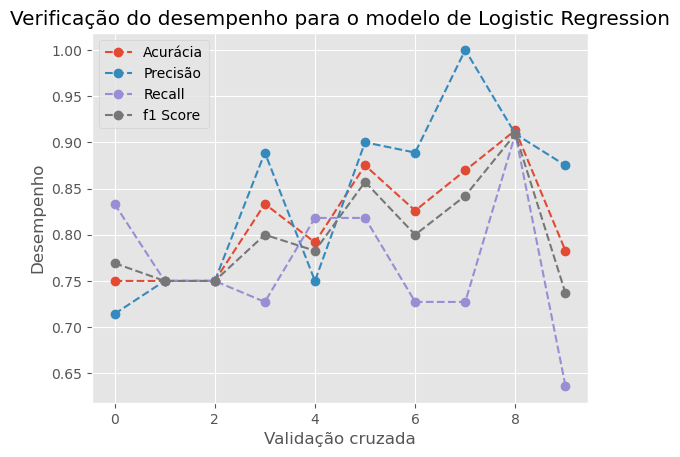

In [1442]:
plt.figure
plt.plot(range(cv), modelos_dict['Logistic Regression']['acurácia'],
         marker='o',linestyle='--',label='Acurácia')
plt.plot(range(cv), modelos_dict['Logistic Regression']['precision'],
        marker='o',linestyle='--',label='Precisão')
plt.plot(range(cv), modelos_dict['Logistic Regression']['recall'],
        marker='o',linestyle='--',label='Recall')
plt.plot(range(cv), modelos_dict['Logistic Regression']['f1 score'],
        marker='o',linestyle='--',label='f1 Score')
plt.legend()
plt.xlabel("Validação cruzada")
plt.ylabel("Desempenho")
plt.title("Verificação do desempenho para o modelo de Logistic Regression")
plt.show()

In [1443]:
print("--- Valores médios das métricas para o Logistic Regression: ")
print(f"Acurácia: {modelos_dict['Logistic Regression']['acurácia'].mean():.4f}")
print(f"Precisão: {modelos_dict['Logistic Regression']['precision'].mean():.4f}")
print(f"Recall: {modelos_dict['Logistic Regression']['recall'].mean():.4f}")
print(f"F1 Score: {modelos_dict['Logistic Regression']['f1 score'].mean():.4f}")

--- Valores médios das métricas para o Logistic Regression: 
Acurácia: 0.8141
Precisão: 0.8426
Recall: 0.7697
F1 Score: 0.7997


Vamos colocar numa tabela para sintetizar todos esses resultados que coletamos:

In [1444]:
Random_forest_list = [modelos_dict['Random Forest']['acurácia'].mean(),
                     modelos_dict['Random Forest']['precision'].mean(),
                     modelos_dict['Random Forest']['recall'].mean(),
                     modelos_dict['Random Forest']['f1 score'].mean()]

SVC_list = [modelos_dict['SVM Classifier']['acurácia'].mean(),
                     modelos_dict['SVM Classifier']['precision'].mean(),
                     modelos_dict['SVM Classifier']['recall'].mean(),
                     modelos_dict['SVM Classifier']['f1 score'].mean()]

KNN_Classifier_list = [modelos_dict['KNN Classifier']['acurácia'].mean(),
                     modelos_dict['KNN Classifier']['precision'].mean(),
                     modelos_dict['KNN Classifier']['recall'].mean(),
                     modelos_dict['KNN Classifier']['f1 score'].mean()]

Logistic_Regression_list = [modelos_dict['Logistic Regression']['acurácia'].mean(),
                     modelos_dict['Logistic Regression']['precision'].mean(),
                     modelos_dict['Logistic Regression']['recall'].mean(),
                     modelos_dict['Logistic Regression']['f1 score'].mean()]

In [1445]:
df_results = pd.DataFrame(data={'Random Forest':Random_forest_list,
                               'SVM Classifier':SVC_list,
                               'KNN Classifier':KNN_Classifier_list,
                               'Logistic Regression':Logistic_Regression_list},
                         index=["Acurácia","Precisão","Recall","F1 Score"])

In [1446]:
df_results

,Random Forest,SVM Classifier,KNN Classifier,Logistic Regression
Acurácia,0.801268,0.640036,0.647464,0.814130
Precisão,0.805812,0.675317,0.640808,0.842615
Recall,0.780303,0.487121,0.628030,0.769697
F1 Score,0.790201,0.558796,0.628200,0.799702


Conforme mostra a tabela, vamos escolher dois modelos, o que apresenta maior valor para o $Recall$ e o que apresenta maior valor para o $F1 Score$. Para essas métricas de avaliação os modelos escolhidos são: `RandomForest`e `Logistic Regression`

## 8. Tunagem dos Hiperparâmetros dos melhores modelos

A tunagem dos hiperparâmetros é importante para otimizar o desempenho do modelo. Quando os mesmos são ajustados corretamente, o modelo pode ser capaz de capturar padrões mais relevantes e ter um melhor desempenho em notos dados.
De maneira geral, essa tunagem é realizada usando as técnicas de `GridSearchCV` e `RandomizedSearchCV`. Ambas utilizando a validação cruzada para explorar diferentes combinações dos dados que serão ajustados.

A seguir iremos as seguintes avaliações:
- Utilizando o modelo de **RandomForest**:
    - Tunagem utilizando RandomizedSearchCV
    - Obter os melhores parâmetros
    - Utilizar esses parâmetros e criar um novo modelo de RandomForest(param=RandomizedSearch)
    - Avaliar esse modelo


- Utilizando o modelo de **LogisticRegression**:
    - Avaliar esse modelo
    - Tunagem utilizando RandomizedSearchCV
    - Obter os melhores parâmetros
    - Utilizar esses parâmetros e criar um novo modelo de LogisticRegression(param=RandomizedSearch)
    - Avaliar esse modelo

### 8.1. Tunagem para o modelo de Random Forest

A tunagem para a Random Forest vão ser avaliados os seguintes hyperparâmetros:
    
   - **max depth**: rege a altura máxima até a qual as _tree's_ dentro da _forest_ podem crescer.
   - **n_estimators**: controla o número de _tree's_ dentro do classificador.
   - **max_features**: ajuda a encontrar o melhor número de  _features_ a serem consideradas.
   - **criterion**: index que avalia o critério de divisão das _leaves_ durante o "crescimento" da _tree_.

In [1447]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [1422]:
param_dist = {"max_depth":[3,None],
              "n_estimators":range(1,20),
             "max_features":np.linspace(1,25,1),
             "criterion": ["gini", "entropy"]}

model_rf = RandomForestClassifier(random_state=42)

In [1425]:
model_rf_rs = RandomizedSearchCV(model_rf, param_dist, cv=10)
model_rf_rs.fit(X_train_final, y_train)
print(f"Melhores Parâmetros: {model_rf_rs.best_params_}")
print(f"Melhor Score: {model_rf_rs.best_score_:.2f}")

Melhores Parâmetros: {'n_estimators': 17, 'max_features': 1.0, 'max_depth': 3, 'criterion': 'entropy'}
Melhor Score: 0.81


In [1426]:
rf_rs = RandomForestClassifier(random_state=42,
                              n_estimators=17,
                              max_features=1,
                              max_depth=3,
                              criterion='entropy')
rf_rs.fit(X_train_final,y_train)
y_rf_rs_pred = rf_rs.predict(X_test_final)
print(f"Recall: {recall_score(y_test,y_rf_rs_pred):.2f}")
print(f"F1 Score: {f1_score(y_test,y_rf_rs_pred):.2f}")

Recall: 0.71
F1 Score: 0.74


### 8.2. Tunagem para o modelo de Logistic Regression

Já para a Logistic Regression serão avaliados os seguintes hyperparâmetros:

- **C**: coeficiente ($1/\lambda$) que controla a importância relativa entre o erro do modelo e o termo de regularização.
- **penalty**: qual tipo de penalidade é avaliada na regularização: L1: LASSO, L2: Ridge e ElasticNet: Combinação de L1 e L2.
- **max_iter**: número máximo de iterações.

In [1427]:
param_dist = {'C':np.logspace(-5,8,20),
             'penalty':['l1','l2','elasticnet'],
             'max_iter':[100, 1000,2500, 5000]}

model_lr = LogisticRegression(random_state=42)

In [1428]:
model_lr_rs = RandomizedSearchCV(model_lr, param_dist, cv=10)
model_lr_rs.fit(X_train_final,y_train)
print(f"Melhores Parâmetros: {model_lr_rs.best_params_}")
print(f"Melhor Score: {model_lr_rs.best_score_:.2f}")

Melhores Parâmetros: {'penalty': 'l2', 'max_iter': 100, 'C': 7847.599703514623}
Melhor Score: 0.84


In [1430]:
lr_rs = LogisticRegression(random_state=42,
                          C=7847.599703514623,
                          penalty='l2',
                          max_iter=100)
lr_rs.fit(X_train_final,y_train)
y_lr_rs_pred = lr_rs.predict(X_test_final)
print(f"Recall: {recall_score(y_test,y_lr_rs_pred):.2f}")
print(f"F1 score: {f1_score(y_test,y_lr_rs_pred):.2f}")

Recall: 0.83
F1 score: 0.85


Dentre os dois modelos avaliados, o Logistic Regression se destacou quando comparado com a RandomForest em termos de métricas de avaliação.
Vamos ainda dar uma olhada na AUC-ROC introduzida anteriormente, para termos certeza da escolha do nosso modelo final.

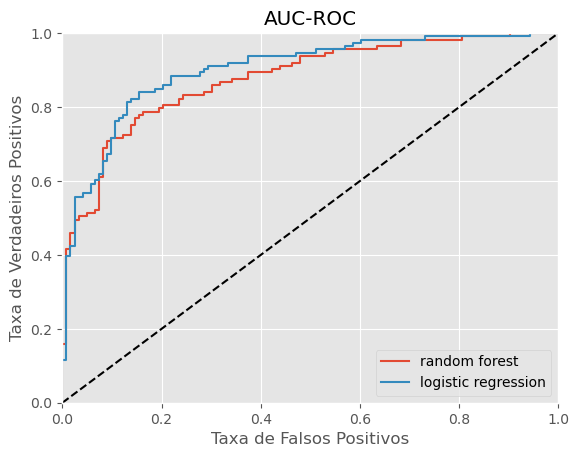

Random Forest - AUC ROC Score: 0.88
Logistic Regression - AUC ROC Score: 0.90


In [1433]:
y_scores_rf = cross_val_predict(rf_rs,
                            X_train_final,y_train,cv=10,
                            method='predict_proba')
y_scores_rf = y_scores_rf[:,1]
y_scores_lr = cross_val_predict(lr_rs,
                            X_train_final,y_train,cv=10,
                            method='decision_function')

fpr_rf,tpr_rf,thresholds_rf = roc_curve(y_train,y_scores_rf)
fpr_lr,tpr_lr,thresholds_lr = roc_curve(y_train,y_scores_lr)
plt.plot(fpr_rf,tpr_rf,label='random forest')
plt.plot(fpr_lr,tpr_lr,label='logistic regression')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.axis([0,1,0,1])
plt.title("AUC-ROC")
plt.legend()
plt.show()

# AUC ROC Score para ambos os modelos
print(f"Random Forest - AUC ROC Score: {roc_auc_score(y_train,y_scores_rf):.2f}")
print(f"Logistic Regression - AUC ROC Score: {roc_auc_score(y_train,y_scores_lr):.2f}")

Pronto! O AUC ROC score da Logistic Regression é maior comparado ao do modelo de Random Forest.

Já para os algoritmos de buscas GridSearchCV e RandomizedSearchCV, ambos encontraram diferentes hiperparâmetros para a construção do modelo, porém o desempenho apresentado por eles é o mesmo. Dessa forma, utilizaremos os hiperparâmetros encontrados pela RandomizedSearchCV como sendo os hiperparâmetros para construir de fato o nosso modelo final.

## 9. Modelo final (modelo_heart_disease)

Vamos finalmente, realizar a construção do modelo final que irá realizar as predições se um paciente novo possui risco de apresentar ou não doença cardíaca.

In [1407]:
modelo_heart_disease = LogisticRegression(random_state=42,
                          C=2.9763514416313193,
                          penalty='l2',
                          max_iter=100)
modelo_heart_disease.fit(X_train_final,y_train)
y_MHD_pred = modelo_heart_disease.predict(X_test_final)
print(f"Acurácia: {accuracy_score(y_test,y_MHD_pred):.2f}")
print(f"Precisão: {precision_score(y_test,y_MHD_pred):.2f}")
print(f"Recall: {recall_score(y_test,y_MHD_pred):.2f}")
print(f"F1 score: {f1_score(y_test,y_MHD_pred):.2f}")


Acurácia: 0.87
Precisão: 0.83
Recall: 0.83
F1 score: 0.83


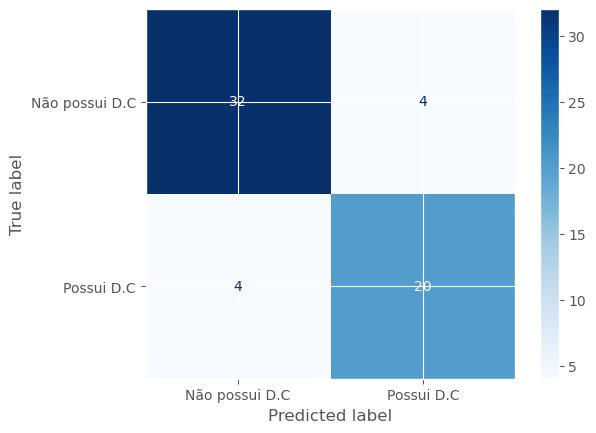

In [1449]:
ConfusionMatrixDisplay.from_estimator(modelo_heart_disease,
                                     X_test_final,y_test,
                                     display_labels=['Não possui D.C',
                                                     'Possui D.C'],
                                     cmap=plt.cm.Blues)

Vimos uma melhora considerável no modelo final quando comparado com o modelo protótipo desenvolvido utilizando uma Decision Tree. A _confusion matrix_ acima mostra uma melhor identificação dos casos onde um paciente que possui risco de ter doença cardíaca, ser diagnosticado como "não possui risco de doença cardíaca", um falso negativo.

Em relação ao modelo protótipo (Decision Tree Pruned), vimos uma melhoria no **recall: 0.75** para **recall: 0.83**, isto é um acréscimo de 10,6% nessa métrica.

Em relação á média do modelo de Logistic Regression desenvolvido inicialmente, houve uma melhoria no **recall: 0.76** para **recall: 0.83**, ou seja, um acréscimo de 9,2%.


## 10. Conclusões finais

- Com o objetivo de criar um modelo de classificação, o projeto se propôs na tarefa analisar as diversas variáveis que influenciam, ou não, na chance de um paciente vir a apresentar doença cardíaca baseado em um diagnóstico preliminar. Baseado nos resultados apresentados no tópico anterior, o mesmo conseguiu desempenhar uma boa performance baseado nas métricas que foram avaliadas.
- O principal ponto nesse processo, foi em dar o devido reconhecimento a qual a pior situação que o erro do modelo pode gerar. Isso ocorre na situação onde o modelo faz um predição de falso negativo. Isto é, o caso onde algum paciente que possui risco de apresentar doença cardíaca, ser diagnosticado como não possui risco de apresentar a doença. O caso contrário também é relevante, porém não possui um impacto tão desastroso como o primeiro. Caso um paciente que não possui risco de apresentar a doença, ser identificado pelo modelo como alguem que possui risco, irá gerar um desconforto e uma preocupação inicial no paciente, pois o mesmo terá que realizar mais exames, provavelmente entrar com algum tipo de tratamento e medicamentos, porém, após mais profundas investigações no caso clínico do paciente, será possível ver que o mesmo não possui tal risco.
- Em uma sociedade que adoece cada dia mais com os diversos fatores do dia-a-dia, estresse, ansiedade, má alimentação, sedentarismo, poluição, entre outros, se faz necessário uma automatização de alguns processos na área da saúde que podem otimizar tarefas, antes realizadas pelos agentes de saúde, mas que pela grande demanda de pacientes, acaba se tornando lento, burocrático e as vezes falho. De forma alguma o papel dos agentes de saúde será substituido, entretando, tornar o primeiro contato dos pacientes com um diagnóstico mais rápido e eficaz, pode entregar uma rotina desses agentes, e também dos pacientes, mais dinâmica. Após esse primeiro contato com um diagnóstico mais rápido elaborado pelo modelo, o paciente e o médico podem focar suas atenções nas melhores medidas a serem tomadas.

### 10.1. Possíveis melhoras no modelo
- Por mais que a avaliação do modelo protótipo foi baseado em uma Decision Tree, os modelos que foram testados para de fato serem utilizados, foram outros. Na etapa de avaliação do modelo protótipo, foi descartada a etapa de _feature scaling_ já que estávamos lidando com um modelo baseado em árvores, conforme explicado naquela sessão. Entretanto, durante a avaliação dos modelos finais, utilizar o conjunto de dados de treino e teste com _feature scaling_ poderia ter elevado o desempenho dos modelos de SVC e KNN que foram descartados.
- Além disso, poderia ser construido uma pipeline das etapas de preprocessamento e de treinamento do modelo, sintetizando e deixando de forma bem clara e explicita, as etapas que o modelo passa até chegar em suas predições finais.